<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/11_RNN_Time_Series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 50kB/s 
     |████████████████████████████████| 501kB 61.2MB/s 
     |████████████████████████████████| 3.1MB 54.4MB/s 


In [0]:
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

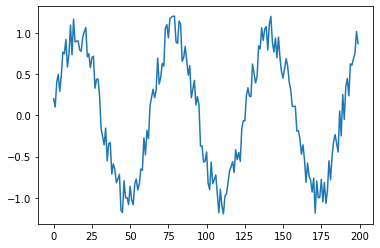

In [0]:
data = np.sin(0.1*np.arange(200)) + np.random.randint(-2, 3, (200,))*0.1
plt.plot(data)

In [0]:
T = 10
X = []
y = []
for i in range(len(data) - T):
  X.append(data[i: i+T])
  y.append(data[i+T])

X = np.array(X).reshape(-1, T, 1) # now the dimension should be (N x T x D)
y = np.array(y)
N = len(X)
X.shape

(190, 10, 1)

In [0]:
i = Input(shape = (T, 1))
x = SimpleRNN(5, activation = None)(i)
x = Dense(1)(x)

model = Model(i, x)
model.compile(loss = "mse", optimizer = Adam(learning_rate = 0.1))

r = model.fit(X[:N//2, :], y[:N//2], validation_data = (X[N//2:, :], y[N//2:]), epochs = 80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 4ms/sample - loss: 0.6048 - val_loss: 0.1930
Epoch 2/80
95/95 [==============================] - 0s 151us/sample - loss: 0.1919 - val_loss: 0.1031
Epoch 3/80
95/95 [==============================] - 0s 153us/sample - loss: 0.0987 - val_loss: 0.1140
Epoch 4/80
95/95 [==============================] - 0s 157us/sample - loss: 0.1023 - val_loss: 0.0725
Epoch 5/80
95/95 [==============================] - 0s 142us/sample - loss: 0.0902 - val_loss: 0.0983
Epoch 6/80
95/95 [==============================] - 0s 129us/sample - loss: 0.0820 - val_loss: 0.0632
Epoch 7/80
95/95 [==============================] - 0s 156us/sample - loss: 0.0556 - val_loss: 0.0724
Epoch 8/80
95/95 [==============================] - 0s 138us/sample - loss: 0.0626 - val_loss: 0.0584
Epoch 9/80
95/95 [==============================] - 0s 141us/sample - loss: 0.0560 - val_loss: 0.0568
Epoch 10/80
95/95 [=====================

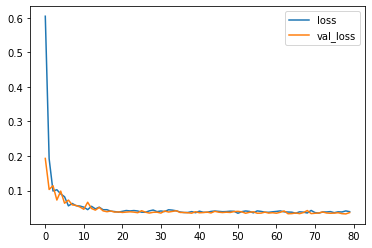

In [0]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

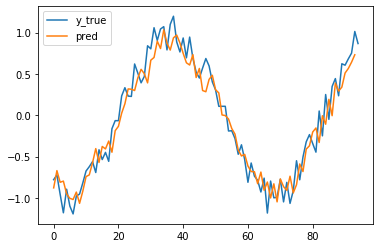

In [0]:
# This is not correct way toe forcast values since here we are taking true values
# and predicting not the predicted values
X_test = X[N//2:, :]
y_test = y[N//2:]
prediction_data = []

for i in range(len(X_test)-1):
  prediction_data.append(model.predict(X_test[i].reshape(-1, 10, 1))[0, 0])

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()

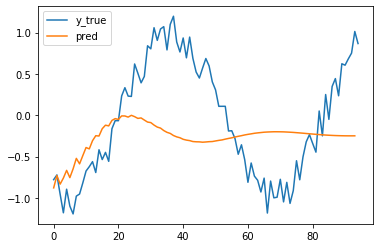

In [0]:
# This is correct way to forcast values since here we are taking predicted values
# to forcast next sequence
y_test = y[N//2:]
prediction_data = []
X_last = X[N//2]

for i in range(len(X_test)-1):
  pred = model.predict(X_last.reshape(-1, 10, 1))[0, 0]
  prediction_data.append(pred)

  X_last = np.roll(X_last, -1)
  X_last[-1] = pred

plt.plot(y_test, label = "y_true")
plt.plot(prediction_data, label = "pred")
plt.legend()